# I. Project Introduction

The electroencephalogram (EEG) is utilized to detect the electrical activity of the brain. The electrical activity is measured by way of the brain's wave patterns at a time when a particular stimulus is introduced. Everyday activities such as reading, listening to music, writing and computer use result in different brain wave patterns being observed. Proper understanding of these differences possesses a strong foundation for the understanding of how the brain processes information. This may hold the key for unlocking treatment and preventative methods of certain learning disabilities and neurodegenerative disorders. Moreover, understanding brain wave activity could play a crucial role in understanding the processes of learning, cognition and memory.

The current project will be conducted to analyze EEG data obtained while a subject was reading during one trial and listening to music during another trial. The data will be used to predict which stimulus tends to result in particular brain wave patterns. Future analysis will use the obtained results to understand how each brain wave pattern relates to the processing of information related to the stimulus.

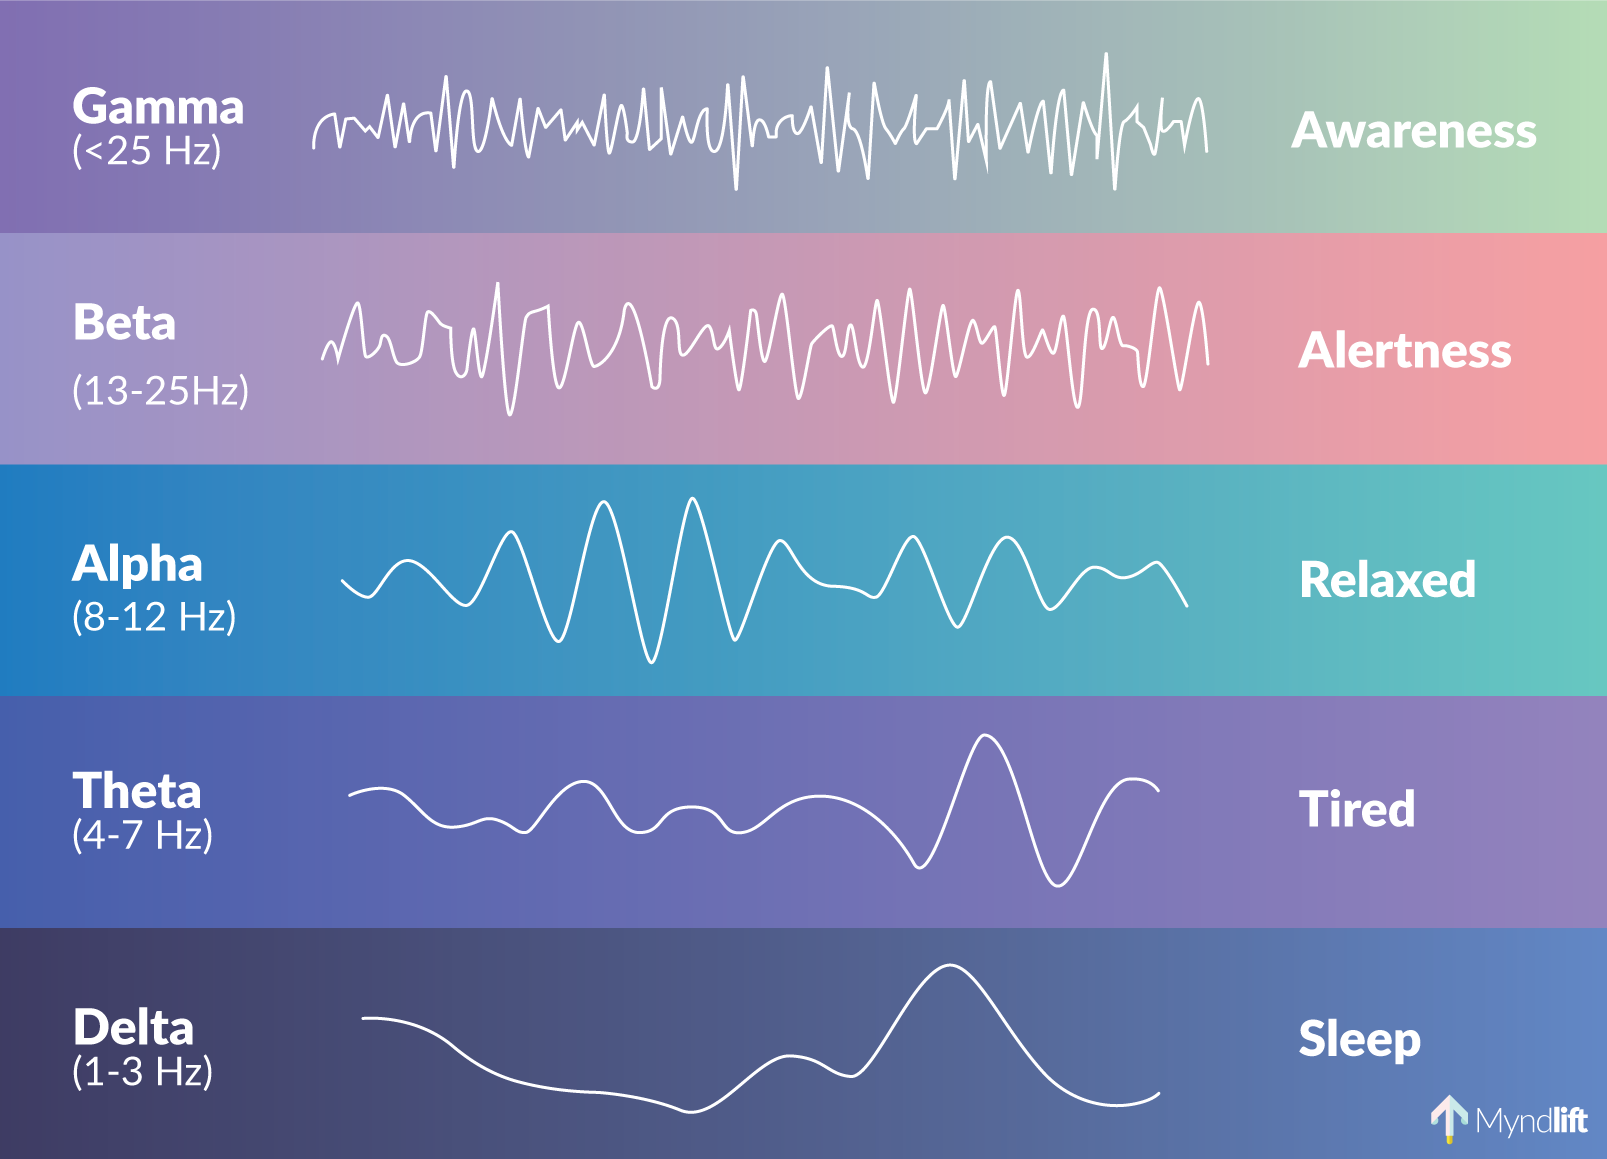

In [9]:
from IPython.display import display, Image
display(Image(filename='brainwaves.png'))


# II. Data Introduction
The data used in this notebook is free and open at:
https://www.kaggle.com/millerintllc/eeg-microexperiment

## Dataset Download
Music_EEG: https://www.kaggle.com/millerintllc/eeg-microexperiment#tiny_eeg_self_experiment_music.csv 

Reading_EEG: https://www.kaggle.com/millerintllc/eeg-microexperiment#tiny_eeg_self_experiment_reading.csv 

## Dataset Details
Donor:

Jason Miller and Light and Latitude, LLC

contact info: linkedin.com/in/jghdatasci

Data Set Information:
The music and reading EEG trials were conducted for 3-4 minutes to record the brain wave activity associated with the tasks. 

The data is based on the researcher using them self as a test subject throughout various trials using a 4-channel EEG with gold-tipped electrodes, a 4-channel Ganglion development board, an elastic EEG cap and both python and Open BCI software.

# III. Outline and Goals of the Project

1. Basic information about the EEG datasets (music and reading).

2. Define the brain wave patterns associated with each stimulus and note if there is a difference using the values of each of the 4 channels during each trial/index.

3. The proper scripts will be used to isolate the data of the 4 Channels.

4. Isolate each trial by the channel values, which are measured in microvolts.

# IV. Information about the EEG datasets

## 1) Data Background
A. The dataset was published on Kaggle by Jason Miller.

B. The company supporting the data is Light and Latitude, LLC. 

C. The dataset only includes one subject, the researcher.

D. The researcher streamed music on an IoT device for the music study and read scholarly articles about wave signal analysis for the reading study. 

E. The datasets include values for each of the 4 channels measured in microvolts, the acceleration of the voltage reading, and timestamp values.

## 2) Module Import

In [16]:
#import of packages for current and future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from mpl_toolkits.mplot3d import Axes3D

## 3) Dataset Import
A. Music_EEG

In [17]:
#Load Music_EEG CSV file
data_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music.csv")
data_musicEEG.head()

,IndexId,Channel1,Channel2,Channel3,Channel4,Ref1,Ref2,Ref3,TS1,TS2
0,0,933.19,519.23,21.71,238.45,0,0,0,20:04:02,1.543190e+12
1,1,932.94,516.98,22.70,251.80,0,0,0,20:04:02,1.543190e+12
2,2,827.70,521.87,17.26,207.42,0,0,0,20:04:02,1.543190e+12
3,3,893.26,519.82,18.90,219.49,0,0,0,20:04:02,1.543190e+12
4,4,953.94,520.69,21.88,252.06,0,0,0,20:04:02,1.543190e+12


B. Reading_EEG

In [18]:
#Load Reading_EEG CSV file
data_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading.csv")
data_readingEEG.head()

,IndexId,Channel1,Channel2,Channel3,Channel4,Ref1,Ref2,Ref3,TS1,TS2
0,0,963.44,281.28,-71.98,-401.54,0.0,0.0,0.0,20:25:24,1.543200e+12
1,1,1011.33,353.28,-51.57,-379.71,0.0,0.0,0.0,20:25:24,1.543200e+12
2,2,979.95,321.36,-107.42,-440.38,0.0,0.0,0.0,20:25:24,1.543200e+12
3,3,934.42,262.01,-111.16,-441.09,0.0,0.0,0.0,20:25:24,1.543200e+12
4,4,996.12,306.95,-52.48,-386.58,0.0,0.0,0.0,20:25:24,1.543200e+12


## 4) Music_EEG and Reading_ EEG datasets 

A. The amount of rows in the datasets are 39,647 for the Music_EEG dataset and 38,256 for the Reading_EEG dataset.

B. The datasets contain 10 columns, four of which will be used for the project: Channel 1, Channel 2, Channel 3, Channel 4. 

C. The channel data is measured with units of microvolts.

In [19]:
data_musicEEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39647 entries, 0 to 39646
Data columns (total 10 columns):
IndexId     39647 non-null int64
Channel1    39647 non-null float64
Channel2    39647 non-null float64
Channel3    39647 non-null float64
Channel4    39647 non-null float64
Ref1        39647 non-null int64
Ref2        39647 non-null int64
Ref3        39647 non-null int64
TS1         39647 non-null object
TS2         39647 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.0+ MB


In [20]:
data_readingEEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38256 entries, 0 to 38255
Data columns (total 10 columns):
IndexId     38256 non-null int64
Channel1    38256 non-null float64
Channel2    38256 non-null float64
Channel3    38255 non-null float64
Channel4    38255 non-null float64
Ref1        38255 non-null float64
Ref2        38255 non-null float64
Ref3        38255 non-null float64
TS1         38255 non-null object
TS2         38255 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.9+ MB


# V. Evaluation of Data

## 1) Isolation of the Channel values
A. Music_EEG

In [21]:
data_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music.csv", index_col="IndexId")
data_musicEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_musicEEG.head()
data_musicEEG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39647 entries, 0 to 171
Data columns (total 4 columns):
Channel1    39647 non-null float64
Channel2    39647 non-null float64
Channel3    39647 non-null float64
Channel4    39647 non-null float64
dtypes: float64(4)
memory usage: 1.5 MB


B. Reading_EEG

In [22]:
data_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading.csv", index_col="IndexId")
data_readingEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_readingEEG.head()
data_readingEEG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38256 entries, 0 to 139
Data columns (total 4 columns):
Channel1    38256 non-null float64
Channel2    38256 non-null float64
Channel3    38255 non-null float64
Channel4    38255 non-null float64
dtypes: float64(4)
memory usage: 1.5 MB


## 2) Correlation Matrices
A. Music_EEG

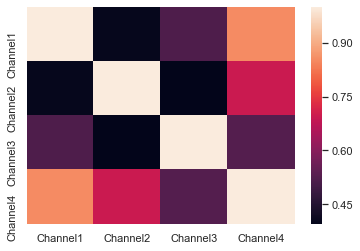

In [50]:
import seaborn as sns; sns.set()
sns.heatmap(data_musicEEG.corr(), vmax=1.0)

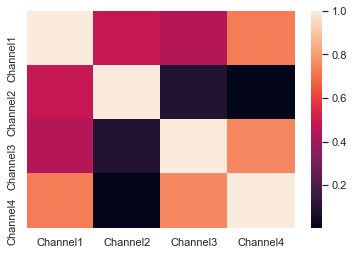

In [49]:
import seaborn as sns; sns.set()
sns.heatmap(data_readingEEG.corr(), vmax=1.0)

## 3) Data Description
A. Music_EEG

In [27]:
data_musicEEG.shape

(39647, 4)

In [28]:
data_musicEEG.nunique()

Channel1    23588
Channel2    12775
Channel3     5764
Channel4    19174
dtype: int64

In [29]:
data_musicEEG.describe()

,Channel1,Channel2,Channel3,Channel4
count,39647.000000,39647.000000,39647.000000,39647.000000
mean,811.456290,423.942070,25.432458,152.077529
std,96.274055,48.395012,15.392610,69.277207
min,-158.400000,-457.320000,-237.860000,-717.890000
25%,734.770000,395.450000,14.645000,106.700000
50%,812.780000,410.970000,25.110000,149.770000
75%,886.965000,442.360000,35.935000,196.805000
max,1391.010000,1171.090000,317.740000,793.010000


B. Reading_EEG

In [30]:
data_readingEEG.shape

(38256, 4)

In [31]:
data_readingEEG.nunique()

Channel1    18156
Channel2    17046
Channel3    15421
Channel4    20709
dtype: int64

In [32]:
data_readingEEG.describe()

,Channel1,Channel2,Channel3,Channel4
count,38256.000000,38256.000000,38255.000000,38255.000000
mean,885.714737,253.251011,-109.272227,-557.089640
std,57.988815,116.794587,60.704773,78.745013
min,260.870000,-4461.710000,-1536.930000,-1421.000000
25%,843.687500,209.510000,-157.850000,-612.430000
50%,883.750000,262.535000,-109.750000,-559.490000
75%,928.190000,304.202500,-62.325000,-505.475000
max,1843.480000,2587.760000,1053.780000,906.110000


# Data Analysis

## 1) Histograms
A. Music_EEG

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24faddd8>,
      dtype=object)

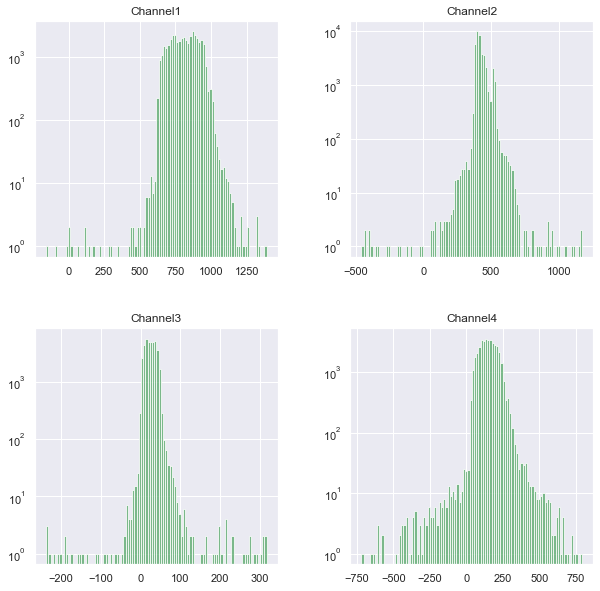

In [59]:
data_musicEEG.hist(histtype = 'bar', align='mid',log=True, color='g',bins=100, figsize=(10,10), alpha=.75)

B. Reading_EEG

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a252949e8>,
      dtype=object)

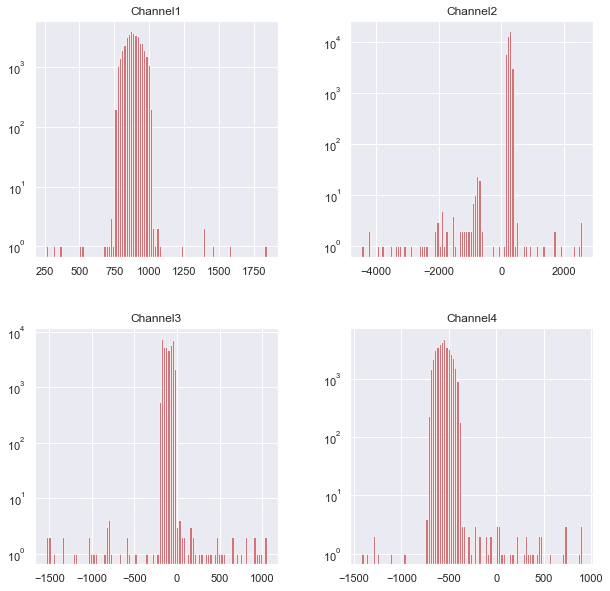

In [60]:
data_readingEEG.hist(histtype = 'bar', log=True, align='mid', color='r',bins=100, figsize=(10,10), alpha=.75)

# 2) Scatter Plots
A. Music_EEG

In [35]:
df_musicEEG = pd.read_csv('tiny_eeg_self_experiment_music_ML.csv', index_col="IndexId")

In [36]:
df_musicEEG.drop(["TS1","TS2"], axis = 1, inplace = True)
df_musicEEG

,Channel1,Channel2,Channel3,Channel4,TS(s)
IndexId,,,,,
0,933.19,519.23,21.71,238.45,72242
1,932.94,516.98,22.70,251.80,72242
2,827.70,521.87,17.26,207.42,72242
3,893.26,519.82,18.90,219.49,72242
4,953.94,520.69,21.88,252.06,72242
5,848.79,519.20,18.79,224.68,72242
6,845.51,516.32,24.37,207.32,72242
7,951.85,522.06,22.15,251.08,72242
8,894.98,525.64,21.90,241.74,72242


<Figure size 10800x10800 with 0 Axes>

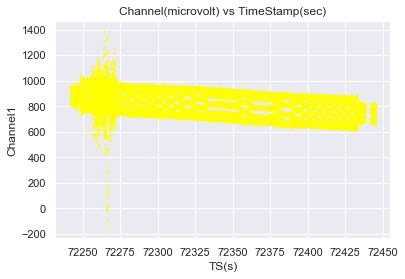

<Figure size 10800x10800 with 0 Axes>

In [63]:
df_musicEEG.plot.scatter(x=int(4), y=int(0), s=4, c='yellow', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

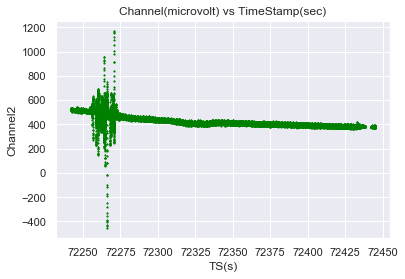

<Figure size 10800x10800 with 0 Axes>

In [65]:
df_musicEEG.plot.scatter(x=int(4), y=int(1), s=4, c='green', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

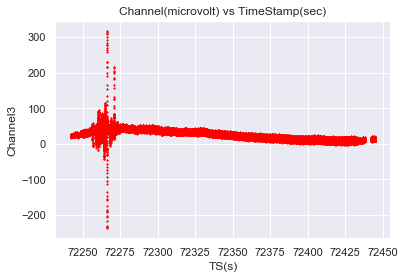

<Figure size 10800x10800 with 0 Axes>

In [66]:
df_musicEEG.plot.scatter(x=int(4), y=int(2), s=4, c='red', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

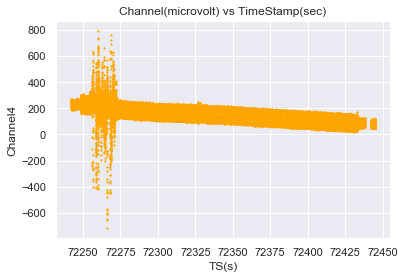

<Figure size 10800x10800 with 0 Axes>

In [67]:
df_musicEEG.plot.scatter(x=int(4), y=int(3), s=4, c='orange', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

B. Reading_EEG

In [53]:
df_readingEEG = pd.read_csv('tiny_eeg_self_experiment_reading_ML.csv', index_col="IndexId")
df_readingEEG.drop(["Ref1", "Ref2", "Ref3","TS1","TS2"], axis = 1, inplace = True)
df_readingEEG = df_readingEEG.drop(df_readingEEG.index[139])

In [54]:
df_readingEEG

,Channel1,Channel2,Channel3,Channel4,TS (s)
IndexId,,,,,
0,963.44,281.28,-71.98,-401.54,73524.0
1,1011.33,353.28,-51.57,-379.71,73524.0
2,979.95,321.36,-107.42,-440.38,73524.0
3,934.42,262.01,-111.16,-441.09,73524.0
4,996.12,306.95,-52.48,-386.58,73524.0
5,1004.17,334.47,-86.05,-419.24,73524.0
6,950.03,281.23,-120.18,-444.21,73524.0
7,969.08,302.25,-68.74,-394.68,73524.0
8,1002.34,324.99,-82.69,-412.16,73524.0


<Figure size 10800x10800 with 0 Axes>

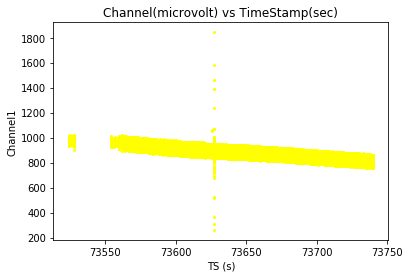

<Figure size 10800x10800 with 0 Axes>

In [70]:
df_readingEEG.plot.scatter(x=int(4), y=int(0), s=4, c='yellow')
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

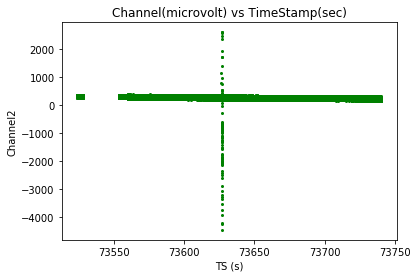

<Figure size 10800x10800 with 0 Axes>

In [69]:
df_readingEEG.plot.scatter(x=int(4), y=int(1), s=4, c='green')
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

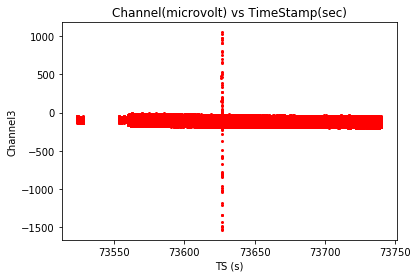

<Figure size 10800x10800 with 0 Axes>

In [68]:
df_readingEEG.plot.scatter(x=int(4), y=int(2), s=4, c='red')
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

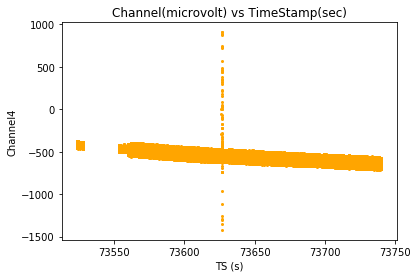

<Figure size 10800x10800 with 0 Axes>

In [67]:
df_readingEEG.plot.scatter(x=int(4), y=int(3), s=4, c='orange')
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))